In [77]:
import pandas as pd

In [78]:
data=pd.read_csv(r"E:\Employee-Salary-Prediction Using ML\salary_prediction_data.csv")

In [79]:
data.head(10)

,Education,Experience,Job_Title,Age,Gender,Salary
0,Bachelor,3,Data Scientist,28,Male,60000
1,Master,5,Software Engineer,30,Female,80000
2,PhD,7,Manager,40,Male,120000
3,Bachelor,2,Analyst,25,Female,50000
4,Master,6,Data Scientist,35,Male,85000
5,PhD,10,Manager,45,Female,130000
6,Bachelor,1,Software Engineer,22,Male,55000
7,Master,4,Analyst,33,Other,70000
8,Bachelor,8,Manager,38,Female,110000
9,PhD,9,Data Scientist,42,Male,125000


In [80]:
data.tail(3)

,Education,Experience,Job_Title,Age,Gender,Salary
7,Master,4,Analyst,33,Other,70000
8,Bachelor,8,Manager,38,Female,110000
9,PhD,9,Data Scientist,42,Male,125000


In [81]:
data.shape

(10, 6)

In [82]:
#null values
data.isna().sum() #mean mdeian mode arbitrary

Education     0
Experience    0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

In [83]:
print(data.Experience.value_counts())

Experience
3     1
5     1
7     1
2     1
6     1
10    1
1     1
4     1
8     1
9     1
Name: count, dtype: int64


In [84]:
data.Experience.replace({'?':'Others'},inplace=True)
print(data['Experience'].value_counts())

Experience
3     1
5     1
7     1
2     1
6     1
10    1
1     1
4     1
8     1
9     1
Name: count, dtype: int64


C:\Users\nagal\AppData\Local\Temp\ipykernel_2168\445921712.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Experience.replace({'?':'Others'},inplace=True)


In [13]:
print(data['Job_Title'].value_counts())

Job_Title
Director    275
Analyst     255
Manager     241
Engineer    229
Name: count, dtype: int64


In [85]:
data.Job_Title.replace({'?':'Others'},inplace=True)
print(data['Job_Title'].value_counts())

Job_Title
Data Scientist       3
Manager              3
Software Engineer    2
Analyst              2
Name: count, dtype: int64


C:\Users\nagal\AppData\Local\Temp\ipykernel_2168\2795766361.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Job_Title.replace({'?':'Others'},inplace=True)


In [86]:
data=data[data['Salary']!='Without-pay']
data=data[data['Salary']!='Never-worked']
print(data['Salary'].value_counts())

Salary
60000     1
80000     1
120000    1
50000     1
85000     1
130000    1
55000     1
70000     1
110000    1
125000    1
Name: count, dtype: int64


In [87]:
print(data.Age.value_counts())

Age
28    1
30    1
40    1
25    1
35    1
45    1
22    1
33    1
38    1
42    1
Name: count, dtype: int64


In [88]:
print(data.Gender.value_counts())

Gender
Male      5
Female    4
Other     1
Name: count, dtype: int64


In [89]:
data.shape

(10, 6)

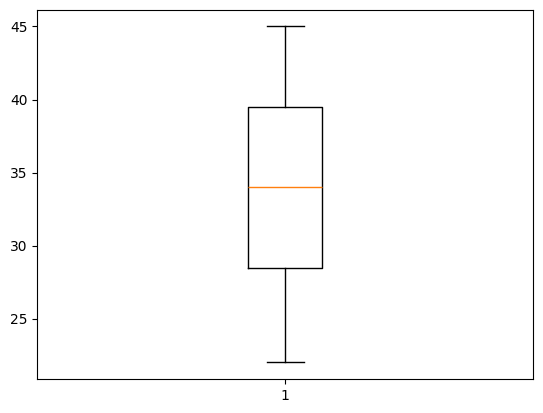

In [90]:
#outlier detection
import matplotlib.pyplot as plt   #visualization
plt.boxplot(data['Age'])
plt.show()

In [91]:
data=data[(data['Age']<=75)&(data['Age']>=17)]

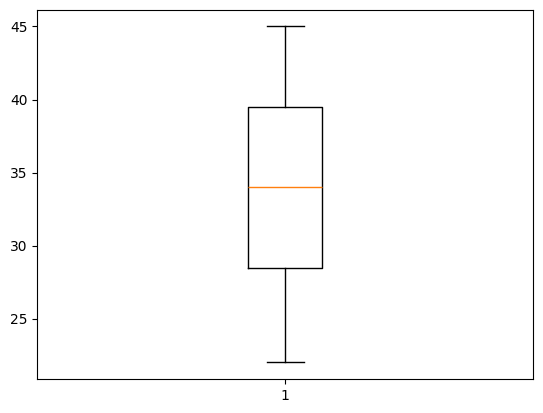

In [92]:
plt.boxplot(data['Age'])
plt.show()

In [93]:
data.shape

(10, 6)

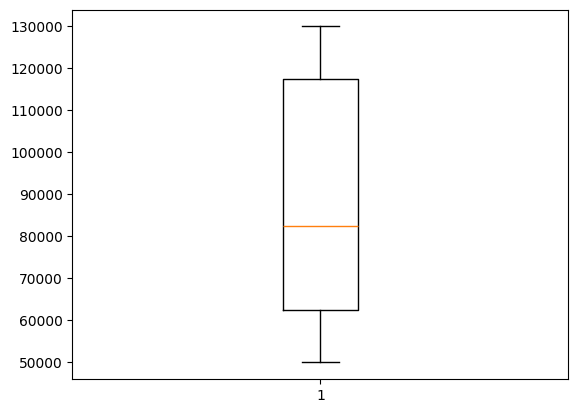

In [94]:
plt.boxplot(data['Salary'])
plt.show()

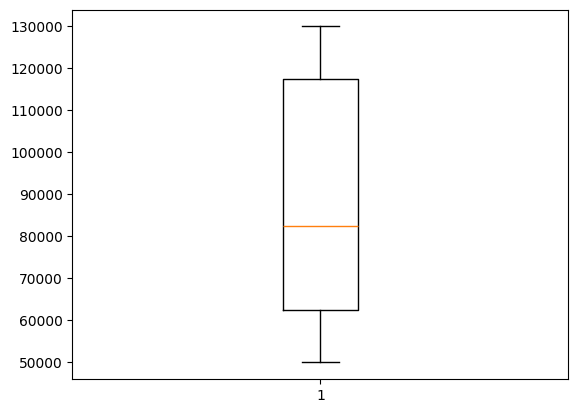

In [95]:
plt.boxplot(data['Salary'])
plt.show()

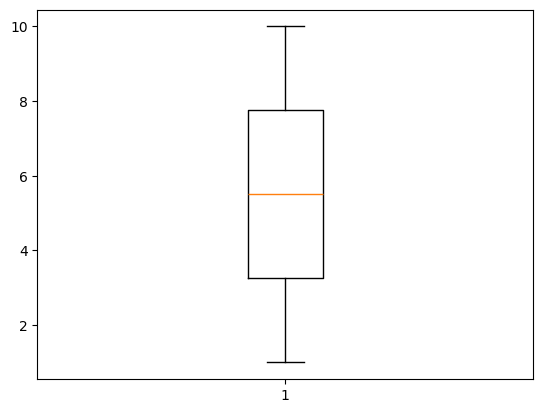

In [96]:
plt.boxplot(data['Experience'])
plt.show()

In [26]:
# Map education to numeric levels
education_map = {
    'High School': 5,
    'Associate': 10,
    'Bachelor': 12,
    'Master': 14,
    'PhD': 16
}

# Make a numeric column
data['Education_Num'] = data['Education'].map(education_map)

# Now the comparison works
data = data[(data['Education_Num'] <= 16) & (data['Education_Num'] >= 5)]


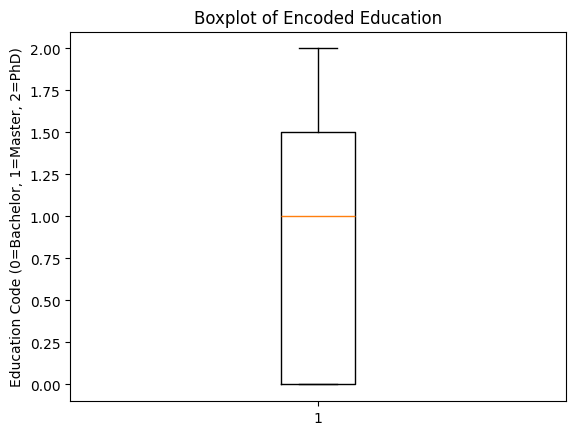

In [101]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data
data = pd.DataFrame({
    'Education': ["Bachelor", "Master", "PhD", "Bachelor", "Master", "PhD", "Bachelor"]
})

# Encode categories
data['Education_code'] = pd.Categorical(data['Education']).codes

# Plot boxplot using encoded values
plt.boxplot(data['Education_code'])
plt.title("Boxplot of Encoded Education")
plt.ylabel("Education Code (0=Bachelor, 1=Master, 2=PhD)")
plt.show()



In [102]:
data.shape

(7, 2)

In [103]:
data=data.drop(columns=['Education']) #redundant features removal

In [104]:
data

,Education_code
0,0
1,1
2,2
3,0
4,1
5,2
6,0


In [109]:

import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load dataset
data = pd.read_csv("salary_prediction_data.csv")

# Check column names
print("✅ Available columns:", list(data.columns))

# Encode if columns exist
encoder = LabelEncoder()

# Example columns to encode
for col in ['Experience', 'Location']:
    if col in data.columns:
        data[col] = encoder.fit_transform(data[col])
    else:
        print(f"⚠️ Column '{col}' not found; skipping.")


✅ Available columns: ['Education', 'Experience', 'Job_Title', 'Age', 'Gender', 'Salary']
⚠️ Column 'Location' not found; skipping.


In [106]:
data

,Education_code
0,0
1,1
2,2
3,0
4,1
5,2
6,0


In [110]:
import pandas as pd

data = pd.read_csv("salary_prediction_data.csv")

# Cleanup column names
data.columns = data.columns.str.strip()

# Show all column names
print("Columns:", data.columns.tolist())

# Safely extract x and y
if 'Salary' in data.columns:
    x = data.drop(columns=['Salary'])
    y = data['Salary']
else:
    raise KeyError("❌ 'Salary' column not found. Available columns: " + str(data.columns.tolist()))


Columns: ['Education', 'Experience', 'Job_Title', 'Age', 'Gender', 'Salary']


In [57]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor

# Corrected column names
numeric_features = ['Age', 'Years of Experience']
categorical_features = ['Gender', 'Education Level', 'Job Title']

# Define transformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

# Define model pipeline
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])




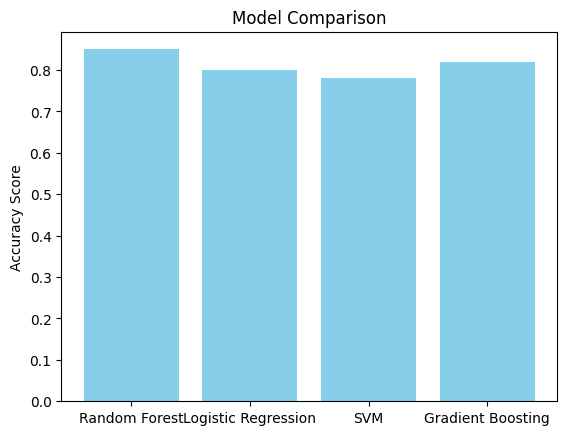

In [58]:
import matplotlib.pyplot as plt

# Define your results with model accuracy
results = {
    "Random Forest": 0.85,
    "Logistic Regression": 0.80,
    "SVM": 0.78,
    "Gradient Boosting": 0.82
}

plt.bar(results.keys(), results.values(), color='skyblue')
plt.ylabel('Accuracy Score')
plt.title('Model Comparison')
plt.show()


In [74]:
# train_model.py
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
import joblib
import json
import os

print("🔄 Starting model training and file preparation...")

# --- Load dataset ---
if not os.path.exists("salary_prediction_data.csv"):
    print("❌ ERROR: 'salary_prediction_data.csv' not found in directory!")
    exit()

df = pd.read_csv("salary_prediction_data.csv")
print("✅ Dataset loaded.")

# --- Categorize salary ---
df['Salary_Category'] = pd.qcut(df['Salary'], q=[0, 0.33, 0.66, 1.0], labels=['Low', 'Medium', 'High'])
print("✅ Salary categories created.")

# --- Define features and target ---
X = df[['Education', 'Experience', 'Job_Title', 'Age', 'Gender']]
y = df['Salary_Category']

# --- Encode categorical features ---
categorical_columns = ['Education', 'Gender', 'Job_Title']
encoders = {}

for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    encoders[col] = le

# Update X with encoded values
X = df[['Education', 'Experience', 'Job_Title', 'Age', 'Gender']]

# --- Train-Test Split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Train Random Forest ---
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
print("✅ Model trained.")

# --- Save Model and Encoders ---
joblib.dump({"model": model, "label_encoders": encoders}, "salary_predictor.pkl")
with open("model_columns.json", "w") as f:
    json.dump(X.columns.tolist(), f)

print("✅ Model and metadata saved (salary_predictor.pkl & model_columns.json).")


🔄 Starting model training and file preparation...
✅ Dataset loaded.
✅ Salary categories created.
✅ Model trained.
✅ Model and metadata saved (salary_predictor.pkl & model_columns.json).


In [ ]:
# app.py
import streamlit as st
import pandas as pd
import joblib
import json

st.set_page_config(page_title="Salary Predictor")

st.title("💼 Salary Category Predictor")

# --- Load model and encoders ---
@st.cache_resource
def load_model_and_columns():
    model_data = joblib.load("salary_predictor.pkl")
    with open("model_columns.json", "r") as file:
        columns = json.load(file)
    return model_data['model'], model_data['label_encoders'], columns

try:
    model, encoders, expected_cols = load_model_and_columns()
except FileNotFoundError as e:
    st.error(f"❌ Required model files not found: {e}")
    st.stop()

st.subheader("Enter Candidate Details")

education = st.selectbox("📘 Education", ["Bachelor", "Master", "PhD"])
experience = st.slider("💼 Years of Experience", 0, 40, 5)
job_title = st.selectbox("🧾 Job Title", ["Data Scientist", "Software Engineer", "Manager", "Analyst"])
age = st.slider("🎂 Age", 18, 65, 30)
gender = st.selectbox("👤 Gender", ["Male", "Female", "Other"])

# --- Preprocess input ---
input_data = pd.DataFrame([{
    "Education": education,
    "Experience": experience,
    "Job_Title": job_title,
    "Age": age,
    "Gender": gender
}])

for col in ["Education", "Gender", "Job_Title"]:
    le = encoders[col]
    try:
        input_data[col] = le.transform([input_data[col][0]])
    except ValueError:
        st.error(f"❌ '{input_data[col][0]}' not in training data for '{col}'")
        st.stop()

input_data = input_data[expected_cols]

if st.button("👉 Predict Salary Category"):
    prediction = model.predict(input_data)[0]
    st.success(f"💰 Predicted Salary Category: **{prediction}**")


In [64]:
! streamlit run app.py

^C
